In [1]:
from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,default,get_pyramid_dataset,lanczos,False,5,True,True


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


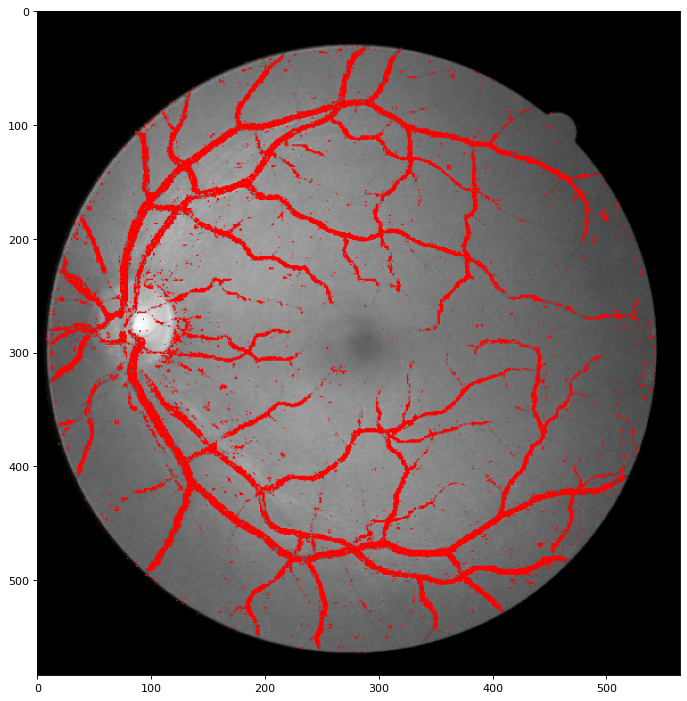

Accuracy score: 0.9250572573561301

F1 score: 0.6960701159174443

Confusion matrix:

     t/p      0     1 
        0 1143637 43908 
        1 58217 116945 
Sensivity: 0.6676390998047522
Specificity: 0.9630262432160466


(0.925, 0.696, 1143637, 43908, 58217, 116945)

In [3]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


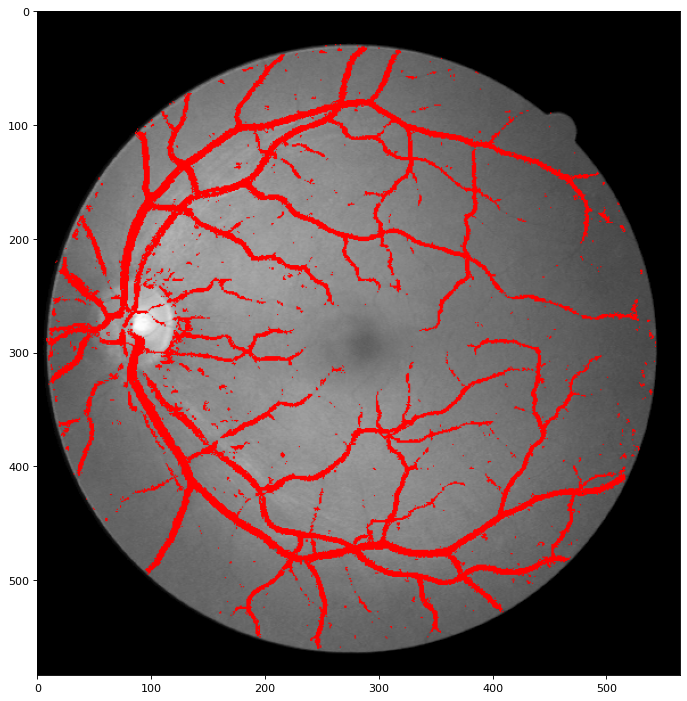

Accuracy score: 0.9331910674855269

F1 score: 0.7432593632879586

Confusion matrix:

     t/p      0     1 
        0 1139885 47660 
        1 43381 131781 
Sensivity: 0.7523378358319727
Specificity: 0.9598667839955538


(0.933, 0.743, 1139885, 47660, 43381, 131781)

In [4]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True, recurrence=True)